In [24]:
# Setup cell

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.color_palette('pastel')
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import KFold, cross_val_score

# Settings
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 100)

In [25]:
# Importing the data 

train_data = pd.read_csv(r"D:\Datasets\Predicting Heart Disease\Warm_Up_Machine_Learning_with_a_Heart_-_Train_Values.csv")

train_data_labels = pd.read_csv(r"D:\Datasets\Predicting Heart Disease\Warm_Up_Machine_Learning_with_a_Heart_-_Train_Labels.csv")

test_data = pd.read_csv(r"D:\Datasets\Predicting Heart Disease\Warm_Up_Machine_Learning_with_a_Heart_-_Test_Values.csv")

train_data_labels.head()

test_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [ ]:
# Data Description: 


# slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

# thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

# resting_blood_pressure (type: int): resting blood pressure

# chest_pain_type (type: int): chest pain type (4 values)

# num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

# fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

# resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

# serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

# oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

# sex (type: binary): 0: female, 1: male

# age (type: int): age in years

# max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)

# exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

In [26]:
train_data = train_data.join(train_data_labels['heart_disease_present'])

In [27]:
train_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [28]:
# Using One-hot encoding for the thal column in order to turn categorical data into numeric values.
# One hot encoding consists of creating 3 new columns for the 3 unique values in the "thal" column
# with binary values for each.

In [29]:
# Encoding nominal values
add = pd.get_dummies(train_data['thal'])

add.head()

,fixed_defect,normal,reversible_defect
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [30]:
train_data = train_data.join(add)

train_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1


In [31]:
train_data = train_data.drop(['thal'],axis = 1)

train_data.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1


In [32]:
add2 = pd.get_dummies(test_data['thal'])

test_data = test_data.join(add2)

test_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,fixed_defect,normal,reversible_defect
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0,0,0,1
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0,0,1,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1,0,0,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0,0,1,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1,0,1,0


In [33]:
test_data = test_data.drop(['thal'],axis = 1)

test_data.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,fixed_defect,normal,reversible_defect
0,olalu7,2,170,1,0,0,2,288,0.2,1,59,159,0,0,0,1
1,z9n6mx,1,138,4,0,0,0,183,1.4,0,35,182,0,0,1,0
2,5k4413,2,120,4,0,0,2,177,2.5,1,43,120,1,0,0,1
3,mrg7q5,1,102,3,1,0,0,318,0.0,0,60,160,0,0,1,0
4,uki4do,2,138,4,1,0,2,166,3.6,1,61,125,1,0,1,0


In [34]:
train_data.describe()

# No missing values

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444,0.044444,0.544444,0.411111
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290,0.206655,0.499410,0.493408
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000,0.000000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
# Turn age into categorical data 

data = [train_data, test_data]
for dataset in data:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 45, 'age'] = 0
    dataset.loc[(dataset['age'] > 45) & (dataset['age'] <= 55), 'age'] = 1
    dataset.loc[(dataset['age'] > 55) & (dataset['age'] <= 62), 'age'] = 2
    dataset.loc[(dataset['age'] > 62) & (dataset['age'] <= 77), 'age'] = 3
    dataset.loc[ dataset['age'] > 77, 'age'] = 4

# let's see how it's distributed
train_data['age'].value_counts()

1    55
2    45
3    43
0    37
Name: age, dtype: int64

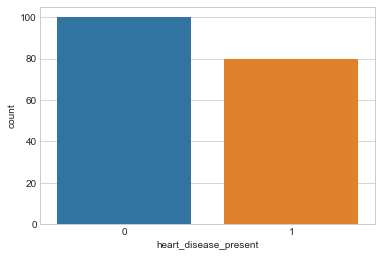

In [36]:
sns.countplot(x='heart_disease_present', data=train_data)

# The two classes (‘Heart Disease’ and ‘No Heart Disease’) are approximately balanced

In [37]:
train_data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present', 'fixed_defect', 'normal', 'reversible_defect'],
      dtype='object')

In [47]:
# Pivot table for analysis

train_data.pivot_table(index=train_data.columns[13], values=train_data.columns[[1,2,3,4,5,6,7,8,9,10,11,12,14,15,16]],aggfunc=np.mean)

#This way I can begin to hypothesise what it is that differentiates the two sets of people within the dataset. 
# For example, on average people with heart disease have a higher value of "oldpeak_eq_st_depression".

,age,chest_pain_type,exercise_induced_angina,fasting_blood_sugar_gt_120_mg_per_dl,fixed_defect,max_heart_rate_achieved,normal,num_major_vessels,oldpeak_eq_st_depression,resting_blood_pressure,resting_ekg_results,reversible_defect,serum_cholesterol_mg_per_dl,sex,slope_of_peak_exercise_st_segment
heart_disease_present,,,,,,,,,,,,,,,
0,1.38,2.8100,0.13,0.1600,0.04,156.87,0.78,0.33,0.62700,130.12,0.9200,0.18,245.46,0.5500,1.3600
1,1.70,3.5875,0.55,0.1625,0.05,140.25,0.25,1.15,1.48875,132.80,1.2125,0.70,253.90,0.8625,1.7875


In [50]:
# Correlation Matrix 

train_data.iloc[:,1:].corr()

# oldpeak_eq_st_depression and slope_of_peak_exercise_st_segment : 0.615 correlation
# Results show that people with "thal" = reversible effect, tend to have a heart disease present 52.5% of the time.
# "thal" = normal, negative correlation with heart_disease_present.


,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.145969,-0.418102,0.225459,0.344224,0.157263,-0.305492,0.243341
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.276799,-0.017521,0.123397,0.078506,0.127950,-0.098964,0.046578
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.068868,-0.301792,0.346266,0.412829,-0.007042,-0.300914,0.307524
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.321697,-0.275687,0.153407,0.421519,-0.015493,-0.185283,0.194026
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.182078,0.058369,-0.005956,0.003379,0.125474,-0.023938,-0.028324
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.132269,-0.102766,0.037773,0.145933,0.043308,0.023521,-0.041946
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.230196,-0.071038,0.083139,0.079775,-0.090092,0.021710,0.015760
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.168374,-0.341045,0.249167,0.382930,0.055930,-0.332991,0.313616
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.132218,-0.053960,0.251096,0.335421,0.144932,-0.421950,0.366381
age,0.145969,0.276799,0.068868,0.321697,0.182078,0.132269,0.230196,0.168374,-0.132218,1.000000,-0.361475,0.069772,0.149031,0.121840,-0.085501,0.035510


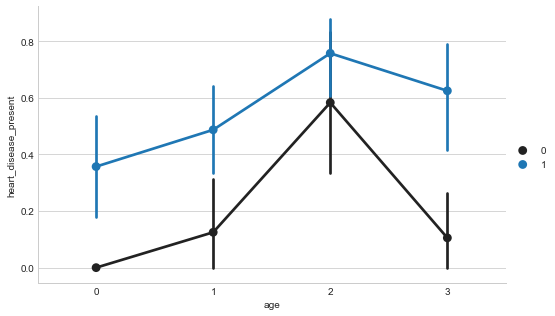

In [58]:
# Compare based on gender and age

FacetGrid = sns.FacetGrid(train_data, size=4.5, aspect=1.6, legend_out = True)
FacetGrid.map(sns.pointplot, 'age', 'heart_disease_present', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

# Observation:
    #Both males and females, in age group = 3 have a higer risk of heart disease.

In [62]:
# Analysing the test data, to see if it is similar to the train data. Since the final model to predict values for the test 
# data will be based on the train data.

test_data.describe()

test_data.iloc[:].corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,fixed_defect,normal,reversible_defect
slope_of_peak_exercise_st_segment,1.000000,0.223842,0.163024,0.193691,0.044656,0.148619,0.049093,0.595488,-0.026445,0.183034,-0.340458,0.310725,0.079284,-0.280062,0.249096
resting_blood_pressure,0.223842,1.000000,-0.066927,0.169652,0.138661,0.182400,0.227196,0.229787,-0.074867,0.258779,-0.072137,0.014140,-0.051468,-0.200864,0.235979
chest_pain_type,0.163024,-0.066927,1.000000,0.182315,-0.115974,0.156845,0.149608,0.321004,-0.059086,0.124884,-0.346625,0.364135,-0.012223,-0.172712,0.185956
num_major_vessels,0.193691,0.169652,0.182315,1.000000,0.005935,0.149202,0.193371,0.347559,0.112786,0.388456,-0.249189,0.158952,0.113551,-0.397918,0.353443
fasting_blood_sugar_gt_120_mg_per_dl,0.044656,0.138661,-0.115974,0.005935,1.000000,0.046647,0.021828,0.010572,-0.015071,-0.014250,-0.045391,0.006299,-0.099728,-0.110791,0.167909
resting_ekg_results,0.148619,0.182400,0.156845,0.149202,0.046647,1.000000,0.163023,0.169409,0.022743,0.108017,-0.024745,0.211753,0.008964,-0.073025,0.071147
serum_cholesterol_mg_per_dl,0.049093,0.227196,0.149608,0.193371,0.021828,0.163023,1.000000,0.125321,-0.303276,0.190016,0.077439,0.067082,-0.110853,-0.103887,0.166621
oldpeak_eq_st_depression,0.595488,0.229787,0.321004,0.347559,0.010572,0.169409,0.125321,1.000000,0.099069,0.243957,-0.365588,0.317523,-0.029266,-0.304139,0.331557
sex,-0.026445,-0.074867,-0.059086,0.112786,-0.015071,0.022743,-0.303276,0.099069,1.000000,0.009823,-0.113092,0.049933,0.193727,-0.353199,0.264544
age,0.183034,0.258779,0.124884,0.388456,-0.014250,0.108017,0.190016,0.243957,0.009823,1.000000,-0.405652,0.151140,0.121628,-0.252484,0.198030


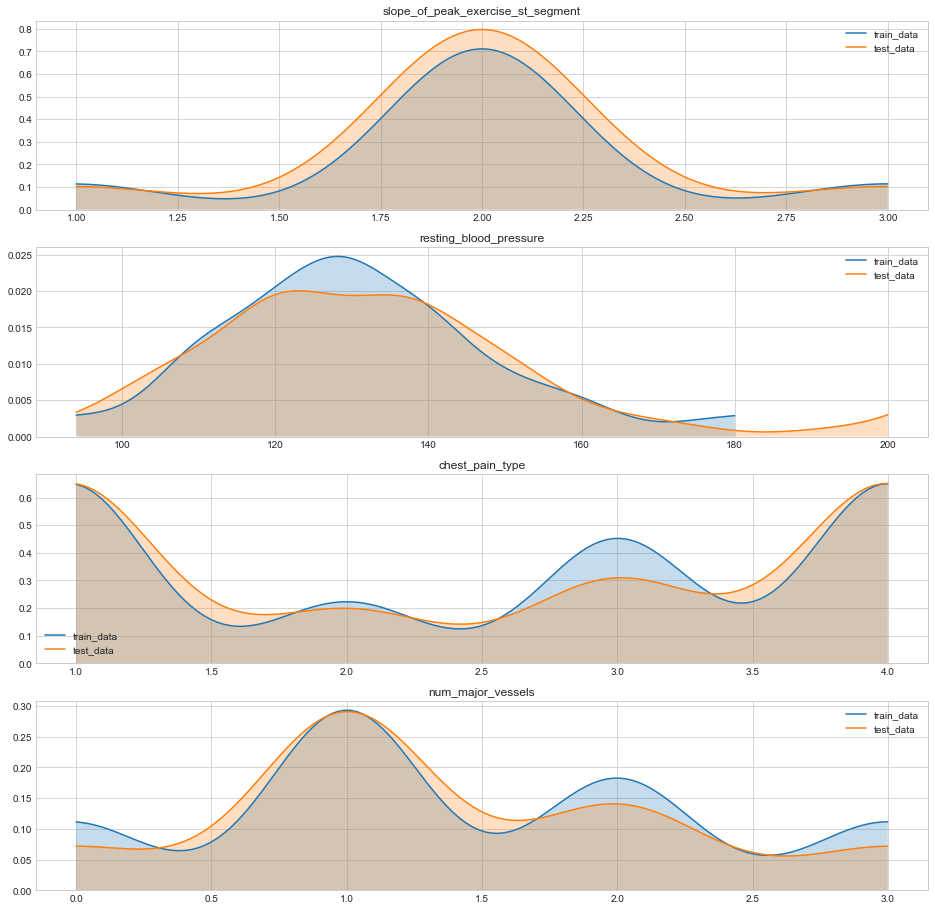

In [71]:
# Compare the distributions of the test and train data

f = plt.figure(figsize=(16,16))
ax1 = f.add_subplot(4,1,1)
ax2 = f.add_subplot(4,1,2)
ax3 = f.add_subplot(4,1,3)
ax4 = f.add_subplot(4,1,4)

ax1.set_title('slope_of_peak_exercise_st_segment')
sns.kdeplot(train_data['slope_of_peak_exercise_st_segment'], shade=True, cut=0, label='train_data',ax=ax1)
sns.kdeplot(test_data['slope_of_peak_exercise_st_segment'], shade=True, cut=0, label='test_data',ax=ax1)

ax2.set_title('resting_blood_pressure')
sns.kdeplot(train_data['resting_blood_pressure'], shade=True, cut=0, label='train_data',ax=ax2)
sns.kdeplot(test_data['resting_blood_pressure'], shade=True, cut=0, label='test_data',ax=ax2)

ax3.set_title('chest_pain_type')
sns.kdeplot(train_data['chest_pain_type'], shade=True, cut=0, label='train_data',ax=ax3)
sns.kdeplot(test_data['chest_pain_type'], shade=True, cut=0, label='test_data',ax=ax3)

ax4.set_title('num_major_vessels')
sns.kdeplot(train_data['num_major_vessels'], shade=True, cut=0, label='train_data',ax=ax4)
sns.kdeplot(test_data['num_major_vessels'], shade=True, cut=0, label='test_data',ax=ax4)
plt.show()

# Both datasets have similar distributions, resting blood pressure has outliers

In [74]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 17 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int32
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
fixed_defect                            180 non-null uint8
normal 

In [75]:
# Converting data type uint8 to int

data = [train_data, test_data]

for dataset in data:
    dataset['fixed_defect'] = dataset['fixed_defect'].astype(int)
    dataset['normal'] = dataset['normal'].astype(int)
    dataset['reversible_defect'] = dataset['reversible_defect'].astype(int)
    
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 17 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int32
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
fixed_defect                            180 non-null int32
normal 

In [79]:
train = train_data.drop(['patient_id'] , axis=1).copy()
test = test_data.drop(['patient_id'], axis=1).copy()

train.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,fixed_defect,normal,reversible_defect
0,1,128,2,0,0,2,308,0.0,1,0,170,0,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,1,158,0,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,3,162,1,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,0,181,0,1,0,0,1
4,3,178,1,0,0,2,270,4.2,1,2,145,0,0,0,0,1


In [93]:
# Building the machine learning model

X_train = train.drop(["heart_disease_present"], axis=1)
Y_train = train["heart_disease_present"]
X_test  = test.copy()

X_train.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,fixed_defect,normal,reversible_defect
0,1,128,2,0,0,2,308,0.0,1,0,170,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,1,158,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,3,162,1,0,1,0
3,1,152,4,0,0,0,223,0.0,1,0,181,0,0,0,1
4,3,178,1,0,0,2,270,4.2,1,2,145,0,0,0,1


In [94]:
#Model #1: Stochastic Gradient Decent: 

import sklearn

sgd = sklearn.linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [95]:
#Model #2: Random Forest:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [96]:
#Model #3: Logistic Regression 

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [97]:
#Model #4: K Nearest Neighbor:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [98]:
#Model #5: Gaussian Naive Bayes:

from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [99]:
#Model #6: Perceptron:

from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=5)

perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [100]:
#Model #7: Linear Support Vector Machine:

from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [101]:
#Model #8: Decision Tree:

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [102]:
#Model #9: RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, Y_train)
Y_pred = random_forest_regressor.predict(X_test)

acc_forest_regressor = round(random_forest_regressor.score(X_train, Y_train) * 100, 2)

In [103]:
#Choosing the best model: 

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree', 'Random Forest Regressor'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree, acc_forest_regressor]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

# Random forest Classifier gave a score of 100%, further analysis must be done using K-folds cross validation. 

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
87.06,Random Forest Regressor
86.11,Support Vector Machines
86.11,Logistic Regression
85.00,KNN
83.89,Naive Bayes
60.00,Stochastic Gradient Decent
55.56,Perceptron


In [104]:
# K-folds Cross Validation, using K=10, Random Forest Classifier

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.66666667 0.77777778 0.94444444 0.83333333 0.88888889
 0.83333333 0.72222222 0.72222222 0.83333333]
Mean: 0.8
Standard Deviation: 0.07934920476158722


In [ ]:
# The model has an average accuracy of 80% and std of 0.079 

In [106]:
#Feature importance 

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
chest_pain_type,0.118
max_heart_rate_achieved,0.115
oldpeak_eq_st_depression,0.113
reversible_defect,0.095
serum_cholesterol_mg_per_dl,0.088
normal,0.088
num_major_vessels,0.081
resting_blood_pressure,0.080
age,0.054


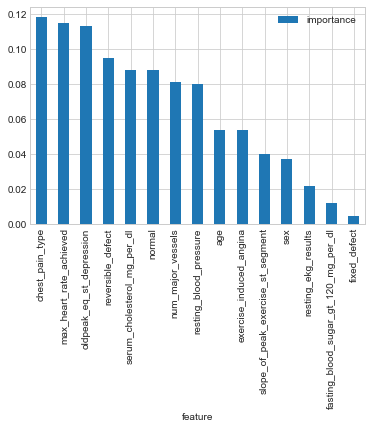

In [107]:
importances.plot.bar()

# Drop fixed_defect and repeat the model

In [108]:
train  = train.drop("fixed_defect", axis=1)
test  = test.drop("fixed_defect", axis=1)

train.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,normal,reversible_defect
0,1,128,2,0,0,2,308,0.0,1,0,170,0,0,1,0
1,2,110,3,0,0,0,214,1.6,0,1,158,0,0,1,0
2,1,125,4,3,0,2,304,0.0,1,3,162,1,1,1,0
3,1,152,4,0,0,0,223,0.0,1,0,181,0,1,0,1
4,3,178,1,0,0,2,270,4.2,1,2,145,0,0,0,1


In [113]:
X_train = train.drop(["heart_disease_present"], axis=1)
Y_train = train["heart_disease_present"]
X_test  = test.copy()

X_train.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,normal,reversible_defect
0,1,128,2,0,0,2,308,0.0,1,0,170,0,1,0
1,2,110,3,0,0,0,214,1.6,0,1,158,0,1,0
2,1,125,4,3,0,2,304,0.0,1,3,162,1,1,0
3,1,152,4,0,0,0,223,0.0,1,0,181,0,0,1
4,3,178,1,0,0,2,270,4.2,1,2,145,0,0,1


In [112]:
test.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,normal,reversible_defect
0,2,170,1,0,0,2,288,0.2,1,2,159,0,0,1
1,1,138,4,0,0,0,183,1.4,0,0,182,0,1,0
2,2,120,4,0,0,2,177,2.5,1,0,120,1,0,1
3,1,102,3,1,0,0,318,0.0,0,2,160,0,1,0
4,2,138,4,1,0,2,166,3.6,1,2,125,1,1,0


In [114]:
#Training the Random Forest Model again, without the "fixed_defect" column

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

100.0 %


In [115]:
#Using out-of-bag samples to estimate the generalization accuracy.
#Note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. 

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 79.44 %


In [116]:
# Random Forest, testing new parameters 

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 84.44 %


In [117]:
#Finally, running the model on the test data and outputting it

random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9111111111111111

In [118]:
Submission_Format = pd.read_csv(r"D:\Datasets\Predicting Heart Disease\Warm_Up_Machine_Learning_with_a_Heart_-_Submission_Format.csv")

Submission_Format.head()

,patient_id,heart_disease_present
0,olalu7,0.5
1,z9n6mx,0.5
2,5k4413,0.5
3,mrg7q5,0.5
4,uki4do,0.5


In [120]:
Submission_Format = Submission_Format.drop(['heart_disease_present'], axis = 1)

Submission_Format.head()

,patient_id
0,olalu7
1,z9n6mx
2,5k4413
3,mrg7q5
4,uki4do


In [131]:
Y_prediction

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [124]:
Submission_Format.describe()

,patient_id
count,90
unique,90
top,6ued22
freq,1


In [134]:
Y_prediction

output = pd.DataFrame({'heart_disease_present': Y_prediction})

output.to_csv('Heart Disease Submission.csv', index=False)

In [135]:
output.dtypes

heart_disease_present    int64
dtype: object

In [137]:
output['heart_disease_present'] = output['heart_disease_present'].astype(float)

In [138]:
output.to_csv('Heart Disease Submission.csv', index=False)

In [139]:
#RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()

random_forest_regressor.fit(X_train, Y_train)
Y_prediction = random_forest_regressor.predict(X_test)

random_forest_regressor.score(X_train, Y_train)

0.8875000000000001

In [140]:
print(Y_prediction)

[0.6 0.  0.8 0.2 1.  0.  0.4 0.9 0.2 0.  0.5 0.4 0.3 0.9 0.1 0.  0.  0.4
 0.9 0.  1.  0.  0.2 0.  0.8 0.9 0.6 0.1 0.4 0.  1.  0.4 0.8 0.3 0.3 0.
 0.5 0.3 0.3 0.4 1.  0.1 1.  0.  1.  0.  0.  0.5 0.2 0.4 0.6 0.  0.8 0.1
 0.5 0.1 0.6 0.3 0.1 0.7 0.1 0.9 0.2 1.  0.2 1.  1.  0.5 1.  0.7 0.3 1.
 1.  1.  0.9 1.  0.9 0.6 0.8 0.4 0.7 0.  0.4 0.9 0.3 0.6 0.6 0.2 0.3 0.1]


In [141]:
output_2 = pd.DataFrame({'heart_disease_present': Y_prediction})

output_2.to_csv('Heart Disease Submission 3.csv', index=False)